## Section1 : Implement KNN Algorithm 

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm
import random

In [2]:
# Loading mnist data in flatten form
# 8x8 images are flattened to 64 dimensional 1-D array

digits = load_digits()

data = digits.data # flattened images data
target = digits.target # ground truth class lables

print("Data shape : {} Target Shape: {}".format(data.shape, target.shape))

Data shape : (1797, 64) Target Shape: (1797,)


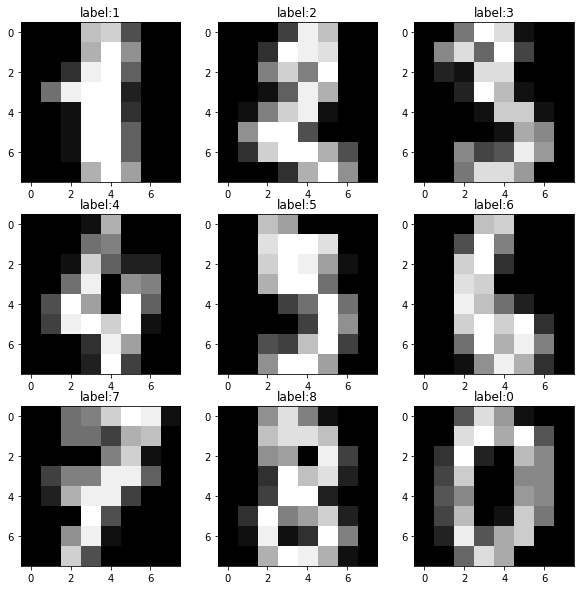

In [3]:
# Visualize data

plt.figure(figsize=(10,10))

for i in range(3):
    for j in range(3):
        s = "33"+str(3*i+j)
        plt.subplot(s)
        plt.imshow(digits.images[3*i+j], cmap='gray')
        plt.title("label:" + str(target[3*i+j]))
plt.show()

In [4]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123)

print("Train data shape: {} Train target shape : {} Test data shape: {} Test Target shape: {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train data shape: (1347, 64) Train target shape : (1347,) Test data shape: (450, 64) Test Target shape: (450,)


### Psuedo code for KNN

### Steps:


- for each sample x_test in the test set:
    
    1. find eucledian distance of x_t to each of the sample x_tr in the training set
    2. sort this distances in ascending order
    3. find the K nearest training samples for the given test sample
    4. find the most occuring label for these K nearest train samples
    5. classifiy test sample into this label


In [5]:
# Knn function that should return the accuracy for the classifcation of the test data set
def most_common(lst):
    data = Counter(lst)
    return max(lst, key=data.get)

def euclid_distance(a, b):
    sum = 0
    assert len(a) == len(b)
    for i in range(len(a)):
        sum += (a[i] - b[i]) ** 2
    return sum ** 0.5

def get_k_neighbours(X_train, y_train, test_row, k):
    dist = []
    for i in range(len(X_train)):
        dist.append((y_train[i], euclid_distance(X_train[i], test_row)))
    dist.sort(key = lambda x : x[1])
    return [x[0] for x in dist[:k]]

def Knn(X_test, y_test, X_train, y_train, k):
    #implement your solution here

    total = 0
    hit = 0
    for i in tqdm(range(len(X_test))):
        neigh = get_k_neighbours(X_train, y_train, X_test[i], k)
        prediction = most_common(neigh)
        hit += int(prediction == y_test[i])
        total += 1

    return hit / total

In [6]:
print(X_train.shape)

(1347, 64)


In [7]:
# Test and visualize the accuracy for different values of K
K_values = [1,5,9,15,21]
accuracies = []
for i in tqdm(range(len(K_values))):
    acc = Knn(X_test, y_test, X_train, y_train, K_values[i])
    accuracies.append(acc)

100%|██████████| 5/5 [03:12<00:00, 38.53s/it]


[0.9777777777777777, 0.9755555555555555, 0.9755555555555555, 0.9688888888888889, 0.9666666666666667]


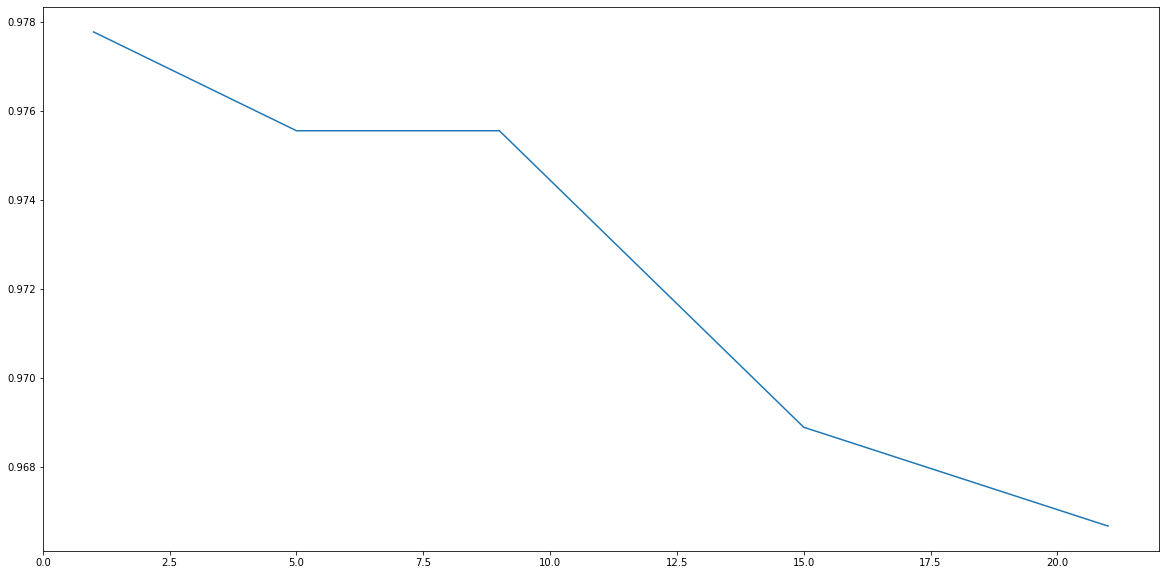

In [8]:
# Visualize the accuracy
print(accuracies)

plt.figure(figsize=(20,10))
plt.plot(K_values,accuracies)
plt.show()

## Section2 : Implement KMeans Algorithm 

### Psuedo code for KMeans

#### Steps:

- Randomly pick k data points as the initial Centroids.
- Find the distance (Euclidean distance or any other distance of your choice) between each data points in our training set with the k centroids.
- Now assign each data point to the closest centroid according to the distance found.
- Update centroid location by taking the average of the points in each cluster group.
- Repeat the Steps 2 to 4 till our centroids don’t change.

You can choose the optimal value of K (Number of Clusters) using methods like the The Elbow method.

In [9]:
#Tranforming data using PCA
from sklearn.decomposition import PCA

data = digits.data # flattened images data
pca = PCA(2)
final_data = pca.fit_transform(data)

#Initial Dimension 
print(data.shape)

#Dimension after PCA
print(final_data.shape)

(1797, 64)
(1797, 2)


In [10]:
#Implement the K-Means Clustering Algorithm
from scipy.spatial.distance import cdist 
 
# KMeans function that should return a list of predicted labels for the data points
def get_membership(k_means, x):
    labels = []
    for i in range(len(x)):
        dist = []
        for j in range(len(k_means)):
            dist.append((j, euclid_distance(k_means[j], x[i])))
        dist.sort(key = lambda x : x[1])
        labels.append(dist[0][0])
    return labels

def get_means(labels, x, k):
    assert(len(labels) == len(x))
    label_list = list(set(labels))
    means = np.zeros(shape=(k, *x[0].shape))
    means_cnt = np.zeros(k)
    for i in range(len(x)):
        opt = labels[i]
        inp = x[i]
        means[opt] += inp
        means_cnt[opt] += 1
    for i in range(len(means)):
        means[i] /= means_cnt[i]
    return means

def kmeans(x, k, no_of_iterations):
    labels = []
    #add your code here
    ind = np.random.choice(x.shape[0], k)
    k_means = x[ind]
    for i in range(no_of_iterations):
        labels = get_membership(k_means, x)
        k_means = get_means(labels, x, k)
    return labels

In [11]:
k = 10                  # Choose a k value
no_of_iterations = 20   # Choose no of iterations

#Apply KMeans function
label = kmeans(final_data,k,no_of_iterations)

### Visualize your results

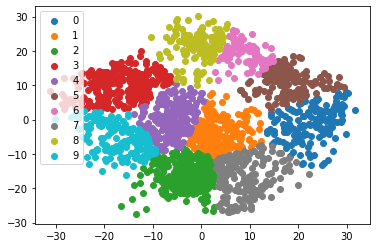

In [12]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(final_data[label == i,0] , final_data[label == i,1] , label = i)
plt.legend()
plt.show()

### Experiment with different k values

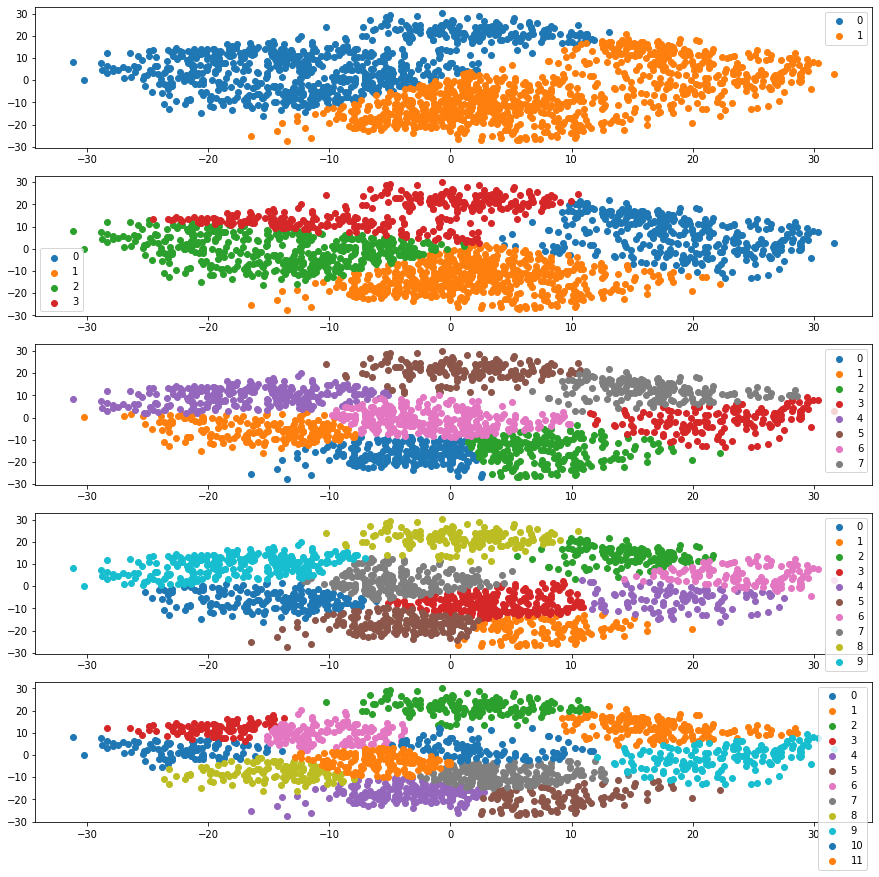

In [19]:
figure, axis = plt.subplots(5, 1, figsize=(15,15))
diff_k = [2, 4, 8, 10, 12]
for j, k in enumerate(diff_k):
    no_of_iterations = 20   # Choose no of iterations
    label = kmeans(final_data,k,no_of_iterations)

    u_labels = np.unique(label)
    for i in u_labels:
        axis[j].scatter(final_data[label == i,0] , final_data[label == i,1] , label = i)
    axis[j].legend()
plt.show()